In [50]:
import pandas as pd
import openpyxl
import plotly.express as px
from pprint import pprint
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
%matplotlib inline

In [51]:
#wb = openpyxl.load_workbook('202206_housing.xlsx')
#wb['1.매매종합']

In [52]:
import xlwings as xw 

path = '202206_housing.xlsx'
wb = xw.Book(path)
sheet = wb.sheets['1.매매종합']
#row_num = 415
row_num = sheet.range(1,1).end('down').end('down').end('down').row
data_range = 'A2:GE' + str(row_num)
raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value

#print(raw_data.head())

bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
# 5개광역시 (인천外)
bigname_list = bignames.split(' ')
bigname_list.append("5개광역시 (인천外)")
big_col = list(raw_data.columns)

small_col = list(raw_data.iloc[0])

pprint(big_col)

['구분',
 '전국',
 '서울',
 '강북\n14개구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '강남\n11개구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '6개광역시',
 '부산',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '대구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '인천',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 '광주',
 None,
 None,
 None,
 None,
 None,
 '대전',
 None,
 None,
 None,
 None,
 None,
 '울산',
 None,
 None,
 None,
 None,
 None,
 '5개광역시\n(인천外)',
 '수도권',
 '세종',
 '경기',
 '수원',
 None,
 None,
 None,
 None,
 '성남',
 None,
 None,
 None,
 '고양',
 None,
 None,
 None,
 '안양',
 None,
 None,
 '부천',
 '의정부',
 '광명',
 '평택',
 '안산',
 None,
 None,
 '과천',
 '구리',
 '남양주',
 '용인',
 None,
 None,
 None,
 '시흥',
 '군포',
 '의왕',
 '하남',
 '오산',
 '파주',
 '이천',
 '안성',
 '김포',
 '양주',
 '동두천',
 '광주',
 '화성',
 '강원',
 '춘천',
 None,
 '원주',
 '충북',
 '청주',
 None,
 None

In [53]:
pprint(small_col)

[None,
 None,
 None,
 None,
 '강북구',
 '광진구',
 '노원구',
 '도봉구',
 '동대문구',
 '마포구',
 '서대문구',
 '성동구',
 '성북구',
 '용산구',
 '은평구',
 '종로구',
 '중구',
 '중랑구',
 None,
 '강남구',
 '강동구',
 '강서구',
 '관악구',
 '구로구',
 '금천구',
 '동작구',
 '서초구',
 '송파구',
 '양천구',
 '영등포구',
 None,
 None,
 '중구',
 '서구',
 '동구',
 '영도구',
 '부산진구',
 '동래구',
 '남구',
 '북구',
 '해운대구',
 '사하구',
 '금정구',
 '연제구',
 '수영구',
 '사상구',
 '기장군',
 '강서구',
 None,
 '중구',
 '동구',
 '서구',
 '남구',
 '북구',
 '수성구',
 '달서구',
 '달성군',
 None,
 '중구',
 '동구',
 '미추홀구',
 '연수구',
 '남동구',
 '부평구',
 '계양구',
 '서구',
 None,
 '동구',
 '서구',
 '남구',
 '북구',
 '광산구',
 None,
 '동구',
 '중구',
 '서구',
 '유성구',
 '대덕구',
 None,
 '중구',
 '남구',
 '동구',
 '북구',
 '울주군',
 None,
 None,
 None,
 None,
 None,
 '장안구',
 '권선구',
 '팔달구',
 '영통구',
 None,
 '수정구',
 '중원구',
 '분당구',
 None,
 '덕양구',
 '일산동구',
 '일산서구',
 None,
 '만안구',
 '동안구',
 None,
 None,
 None,
 None,
 None,
 '단원구',
 '상록구',
 None,
 None,
 None,
 None,
 '처인구',
 '기흥구',
 '수지구',
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 Non

In [54]:
for num, gu_data in enumerate(small_col):
    if gu_data == None:
        small_col[num] = big_col[num]
        
    check = num
    while True:
        if big_col[check] in bigname_list:
            big_col[num] = big_col[check]
            break
        else:
            check -= 1
            
print(big_col)

['구분', '전국', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '서울', '6개광역시', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '부산', '대구', '대구', '대구', '대구', '대구', '대구', '대구', '대구', '대구', '인천', '인천', '인천', '인천', '인천', '인천', '인천', '인천', '인천', '광주', '광주', '광주', '광주', '광주', '광주', '대전', '대전', '대전', '대전', '대전', '대전', '울산', '울산', '울산', '울산', '울산', '울산', '울산', '수도권', '세종', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '경기', '광주', '광주', '강원', '강원', '강원', '강원', '충북', '충북', '충북', '충북', '충북', '충북', '충북', '충북', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '충남', '전북', '전북', '전북', '전북', '전북', '전북', '전남', '전남', '전남', '전남', '전남', '경북', '경북',

In [55]:
print(big_col[129:131])
print(small_col[185])

big_col[129] = '경기' 
big_col[130] = '경기'
small_col[185] = '서귀포'

['광주', '광주']
제주/
서귀포


In [56]:
raw_data.columns = [big_col, small_col]
print(raw_data.columns)
new_col_data = raw_data.drop([0, 1])

MultiIndex([(  '구분',       '구분'),
            (  '전국',       '전국'),
            (  '서울',       '서울'),
            (  '서울', '강북\n14개구'),
            (  '서울',      '강북구'),
            (  '서울',      '광진구'),
            (  '서울',      '노원구'),
            (  '서울',      '도봉구'),
            (  '서울',     '동대문구'),
            (  '서울',      '마포구'),
            ...
            (  '경남',      '의창구'),
            (  '경남',      '진해구'),
            (  '경남',       '양산'),
            (  '경남',       '거제'),
            (  '경남',       '진주'),
            (  '경남',       '김해'),
            (  '경남',       '통영'),
            ( '제주도',      '제주도'),
            ( '제주도',      '서귀포'),
            ('기타지방',     '기타지방')],
           length=187)


In [57]:
pprint(new_col_data)

       구분          전국          서울                                      \
       구분          전국          서울    강북\n14개구         강북구         광진구   
2    86.1    27.68215   23.472864   32.594416        None        None   
3     2.0    27.68215   23.472864   32.554907        None        None   
4     3.0   27.723591   23.440488   32.554907        None        None   
5     4.0   27.516389   23.310982   32.436382        None        None   
6     5.0   27.392068   23.116724   32.080807        None        None   
..    ...         ...         ...         ...         ...         ...   
435   2.0  100.207368  100.196351  100.249743  100.044046   100.39913   
436   3.0  100.305605  100.252724  100.278068  100.045391  100.426325   
437   4.0  100.516504  100.379697  100.346183  100.079498  100.736142   
438   5.0  100.768293  100.557572  100.514011  100.107569   101.29182   
439   6.0  100.868527  100.723141  100.673584  100.170506  101.431506   

                                                  

1986-01-01      27.68215
1986-02-01      27.68215
1986-03-01     27.723591
1986-04-01     27.516389
1986-05-01     27.392068
                 ...    
2022-02-01    100.207368
2022-03-01    100.305605
2022-04-01    100.516504
2022-05-01    100.768293
2022-06-01    100.868527
Name: (전국, 전국), Length: 438, dtype: object
<class 'pandas.core.series.Series'>


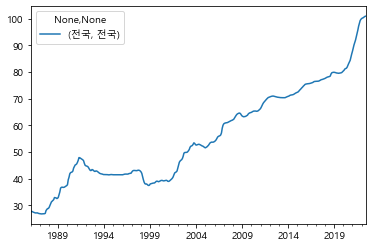

In [67]:
index_list = list(new_col_data['구분']['구분'])

#print(index_list)

new_index = []

for num, raw_index in enumerate(index_list):
    tmp = str(raw_index).split('.')
    if int(tmp[0]) > 12:
        if len(tmp[0]) == 2:
            new_index.append('19' + tmp[0] + '.' + tmp[1])
        else:
            new_index.append(f'{tmp[0]}.{tmp[1]}')
    else:
        new_index.append(new_index[num-1].split('.')[0] + '.' + tmp[0])
        
new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
cleaned_data = new_col_data.drop(('구분', '구분'), axis=1)

pprint(cleaned_data['전국', '전국'])
print(type(cleaned_data['전국', '전국']))
cleaned_data['전국', '전국'].plot(legend='전국')
plt.show()

#fig = px.line(cleaned_data['전국', '전국'], x='date', y='한국 전국 부동산 지수')
#fig.show()

In [59]:
# [예제 2.11] 전처리 함수화 

def KBpriceindex_preprocessing(path, data_type):
    # path : KB 데이터 엑셀 파일의 디렉토리 (문자열)
    # data_type : ‘매매종합’, ‘매매APT’, ‘매매연립’, ‘매매단독’, ‘전세종합’, ‘전세APT’, ‘전세연립’, ‘전세단독’ 중 하나
    
    wb = xw.Book(path)                
    sheet = wb.sheets[data_type]   
    row_num = sheet.range(1,1).end('down').end('down').end('down').row  
    data_range = 'A2:GE' + str(row_num)
    raw_data = sheet[data_range].options(pd.DataFrame, index=False, header=True).value 
    
    bignames = '서울 대구 부산 대전 광주 인천 울산 세종 경기 강원 충북 충남 전북 전남 경북 경남 제주도 6개광역시 5개광역시 수도권 기타지방 구분 전국'
    bigname_list = bignames.split(' ')
    big_col = list(raw_data.columns)
    small_col = list(raw_data.iloc[0])

    for num, gu_data in enumerate(small_col):
        if gu_data == None:
            small_col[num] = big_col[num]

        check = num
        while True:
            if big_col[check] in bigname_list:
                big_col[num] = big_col[check]
                break
            else:
                check = check - 1
                
    big_col[129] = '경기' 
    big_col[130] = '경기'
    small_col[185] = '서귀포'
    
    raw_data.columns = [big_col, small_col]
    new_col_data = raw_data.drop([0,1])
    
    index_list = list(new_col_data['구분']['구분'])

    new_index = []

    for num, raw_index in enumerate(index_list):
        temp = str(raw_index).split('.')
        if int(temp[0]) > 12 :
            if len(temp[0]) == 2:
                new_index.append('19' + temp[0] + '.' + temp[1])
            else:
                new_index.append(temp[0] + '.' + temp[1])
        else:
            new_index.append(new_index[num-1].split('.')[0] + '.' + temp[0])

    new_col_data.set_index(pd.to_datetime(new_index), inplace=True)
    cleaned_data  = new_col_data.drop(('구분', '구분'), axis=1)
    return cleaned_data

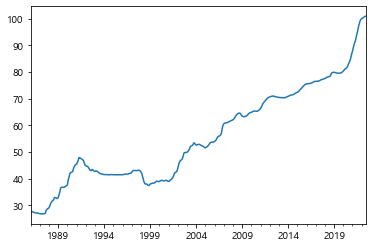

In [73]:
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)
#rc('Pretendard', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

path = r'202206_housing.xlsx'

data_type = '1.매매종합'
new_data = KBpriceindex_preprocessing(path, data_type)
new_data['전국']['전국'].plot(legend='전국')
plt.show()